In [62]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import ast
import glob
import pickle
plt.rcParams.update({'font.size': 18})

In [63]:
files = glob.glob('/Users/jane/Desktop/search+youtube/*.csv')

In [64]:
for f in files:
    df = pd.read_csv(f)
df.head()

,Unnamed: 0,Unnamed: 0.1,ratings,action,categories,dislikes,likes,durations,view_cnts,years,months,days,hours,minutes,weekdays,link,titles,source,query,datetime
0,4576,4233,NaN,Searched,[['/Hobbies & Leisure/Special Occasions/Holida...,NaN,NaN,NaN,NaN,2020,1,1,22,53,2,NaN,NaN,search,New Year's Day,2020-01-01 22:53:00
1,4570,4227,NaN,Visited,"[['/Travel/Hotels & Accommodations', 0.9700000...",NaN,NaN,NaN,NaN,2020,1,1,22,56,2,NaN,NaN,search,A Kissimmee Hotel Near Disney World | Westgate...,2020-01-01 22:56:00
2,4571,4228,NaN,NaN,"[['/Travel/Hotels & Accommodations', 0.8000000...",NaN,NaN,NaN,NaN,2020,1,1,22,56,2,NaN,NaN,search,Westgate Town Center Resort,2020-01-01 22:56:00
3,4575,4232,NaN,Searched,"[['/Travel/Tourist Destinations', 0.5600000023...",NaN,NaN,NaN,NaN,2020,1,1,22,56,2,NaN,NaN,search,mystic dunes orlando,2020-01-01 22:56:00
4,4573,4230,NaN,Visited,"[['/Travel/Hotels & Accommodations', 0.6800000...",NaN,NaN,NaN,NaN,2020,1,1,22,56,2,NaN,NaN,search,https://www.mystic-dunes-resort.com/,2020-01-01 22:56:00


In [65]:
#Using source label on dataframe
source_df = df[['months', 'source']]
source_df.groupby(['months', "source"], as_index=False)
tabbed = pd.crosstab(index=source_df['months'], columns=source_df['source'])
source = tabbed.reset_index()
source.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
months     5 non-null int64
search     5 non-null int64
youtube    5 non-null int64
dtypes: int64(3)
memory usage: 192.0 bytes


Text(0.5,1,'Search and Youtube Count Jan-May')

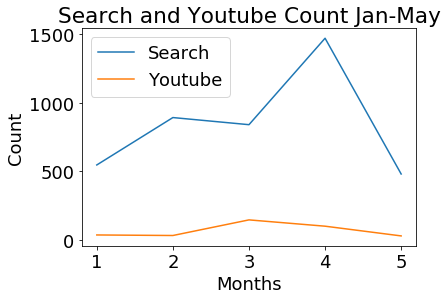

In [66]:
#Plotting searched v. youtube
plot1 = plt.plot(source['months'], source['search'], label='Search')
plot2 = plt.plot(source['months'], source['youtube'], label='Youtube')
plt.xlabel('Months')
plt.ylabel('Count')
plt.legend()
plt.title("Search and Youtube Count Jan-May")

In [67]:
#Using action label on dataframe
action_df = df[['months', 'action']]
action_df.groupby(['months', "action"], as_index=False)
tabbed_2 = pd.crosstab(index=action_df['months'], columns=action_df['action'])
action = tabbed_2.reset_index()
action.head()

action,months,Searched,Visited,Watched
0,1,292,225,33
1,2,481,383,30
2,3,430,383,141
3,4,726,716,98
4,5,238,228,29


Text(0.5,1,'Searched, Watched, and Visited Count, Jan-May')

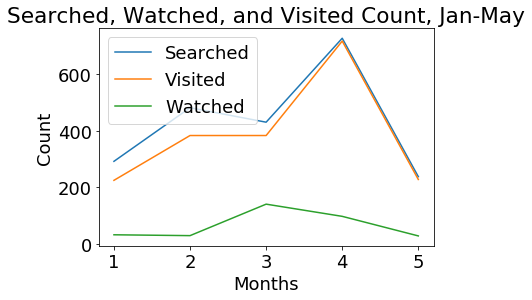

In [70]:
#Plotting actions
plot1 = plt.plot(action['months'], action['Searched'], label='Searched')
plot2 = plt.plot(action['months'], action['Visited'], label='Visited')
plot3 = plt.plot(action['months'], action['Watched'], label='Watched')
plt.xlabel('Months')
plt.ylabel('Count')
plt.legend()
plt.title("Searched, Watched, and Visited Count, Jan-May")